In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Loading the datasets
actual_data = pd.read_csv('actual.csv')
train_data = pd.read_csv('data_set_ALL_AML_train.csv') 
test_data = pd.read_csv('data_set_ALL_AML_independent.csv')

In [3]:
# Check the first few rows of each dataset
print("Actual Data (Labels):")
print(actual_data.head())

print("\nTraining Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Actual Data (Labels):
   patient cancer
0        1    ALL
1        2    ALL
2        3    ALL
3        4    ALL
4        5    ALL

Training Data:
                      Gene Description Gene Accession Number    1 call    2  \
0  AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at -214    A -139   
1  AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at -153    A  -73   
2  AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at  -58    A   -1   
3  AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   88    A  283   
4  AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at -295    A -264   

  call.1    3 call.2    4 call.3  ...   29 call.33   30 call.34   31 call.35  \
0      A  -76      A -135      A  ...   15       A -318       A  -32       A   
1      A  -49      A -114      A  ... -114       A -192       A  -49       A   
2      A -307      A  265      A  ...    2       A  -95       A   49       A   
3      A  309      A   12      A  ...  193       A  312    

In [4]:
# Check data types 
print("\nData Types:")
print(train_data.dtypes)

print("\nData Types:")
print(test_data.dtypes)

print("\nData Types:")
print(actual_data.dtypes)


Data Types:
Gene Description         object
Gene Accession Number    object
1                         int64
call                     object
2                         int64
                          ...  
call.35                  object
32                        int64
call.36                  object
33                        int64
call.37                  object
Length: 78, dtype: object

Data Types:
Gene Description         object
Gene Accession Number    object
39                        int64
call                     object
40                        int64
                          ...  
call.31                  object
64                        int64
call.32                  object
62                        int64
call.33                  object
Length: 70, dtype: object

Data Types:
patient     int64
cancer     object
dtype: object


In [5]:
#checking for missingness
print("\nMissing Values:")
print(train_data.isnull().sum())

#checking for missingness
print("\nMissing Values:")
print(test_data.isnull().sum())

#checking for missingness
print("\nMissing Values:")
print(actual_data.isnull().sum())


Missing Values:
Gene Description         0
Gene Accession Number    0
1                        0
call                     0
2                        0
                        ..
call.35                  0
32                       0
call.36                  0
33                       0
call.37                  0
Length: 78, dtype: int64

Missing Values:
Gene Description         0
Gene Accession Number    0
39                       0
call                     0
40                       0
                        ..
call.31                  0
64                       0
call.32                  0
62                       0
call.33                  0
Length: 70, dtype: int64

Missing Values:
patient    0
cancer     0
dtype: int64


In [6]:
# Count the number of columns containing "call" in their names
call_column_count = sum(col.startswith('call') for col in train_data.columns)

print("Number of 'call' columns:", call_column_count)


Number of 'call' columns: 38


In [7]:
# Count the number of columns containing "call" in their names
call_column_count = sum(col.startswith('call') for col in test_data.columns)

print("Number of 'call' columns:", call_column_count)

Number of 'call' columns: 34


In [8]:
# Specify the exact column names to be dropped
columns_to_drop = ['call', 'call.1', 'call.2', 'call.3', 'call.4', 'call.5', 'call.6', 'call.7', 'call.8', 'call.9',
                   'call.10', 'call.11', 'call.12', 'call.13', 'call.14', 'call.15', 'call.16', 'call.17', 'call.18',
                   'call.19', 'call.20', 'call.21', 'call.22', 'call.23', 'call.24', 'call.25', 'call.26', 'call.27',
                   'call.28', 'call.29', 'call.30', 'call.31', 'call.32', 'call.33', 'call.34', 'call.35', 'call.36',
                   'call.37']

# Drop the specified columns
train_data = train_data.drop(columns=columns_to_drop)


In [9]:
column_names = train_data.columns
print(column_names)

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')


In [10]:
# Specify the exact column names to be dropped
columns_to_drop = ['call', 'call.1', 'call.2', 'call.3', 'call.4', 'call.5', 'call.6', 'call.7', 'call.8', 'call.9',
                   'call.10', 'call.11', 'call.12', 'call.13', 'call.14', 'call.15', 'call.16', 'call.17', 'call.18',
                   'call.19', 'call.20', 'call.21', 'call.22', 'call.23', 'call.24', 'call.25', 'call.26', 'call.27',
                   'call.28', 'call.29', 'call.30', 'call.31', 'call.32', 'call.33']

# Drop the specified columns
test_data = test_data.drop(columns=columns_to_drop)

In [11]:
column_names = test_data.columns
print(column_names)

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')


In [12]:
# Transpose train_data
train_transposed = train_data.transpose()

# Transpose test_data
test_transposed = test_data.transpose()


In [13]:
test_transposed.shape

(36, 7129)

In [14]:
train_transposed.shape

(40, 7129)

Joined the Train and Test Data for further analysis, we can split them later when we are training the model for predictive model

In [15]:
total_data=pd.concat([train_transposed, test_transposed])

In [16]:
total_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37


In [17]:
total_data.isnull().sum().any()

False

I will drop Gene Description and Gene Accession Number row as they do not provide useful information for building a predictive analysis model

In [18]:
rows_to_drop =['Gene Description','Gene Accession Number']
total_data.drop(rows_to_drop , axis=0 , inplace=True)

In [19]:
total_data = total_data.reset_index()
total_data.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
          7119,    7120,    7121,    7122,    7123,    7124,    7125,    7126,
          7127,    7128],
      dtype='object', length=7130)

Renaming the index column to patient because the actual data has patient column it can merged later for further predictive analysis

In [20]:
total_data.rename(columns={'index':'patient'} , inplace = True)

In [21]:
total_data.shape

(72, 7130)

In [22]:
total_data.head(5)


,patient,0,1,2,3,4,5,6,7,8,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25


Merging the actual and main dataset

In [23]:
print("\nData Types:")
print(total_data.dtypes)


Data Types:
patient    object
0          object
1          object
2          object
3          object
            ...  
7124       object
7125       object
7126       object
7127       object
7128       object
Length: 7130, dtype: object


In [24]:
# Convert all columns to data type int64
total_data = total_data.astype('int64')

In [25]:
print("\nData Types:")
print(total_data.dtypes)


Data Types:
patient    int64
0          int64
1          int64
2          int64
3          int64
           ...  
7124       int64
7125       int64
7126       int64
7127       int64
7128       int64
Length: 7130, dtype: object


In [26]:

# Merge actual_data with total_data based on the "patient" column
merged_data = actual_data.merge(total_data, on="patient")


In [27]:
print("\nData Types:")
print(merged_data.dtypes)


Data Types:
patient     int64
cancer     object
0           int64
1           int64
2           int64
            ...  
7124        int64
7125        int64
7126        int64
7127        int64
7128        int64
Length: 7131, dtype: object


In [28]:
merged_data.head(5)

,patient,cancer,0,1,2,3,4,5,6,7,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,1,ALL,-214,-153,-58,88,-295,-558,199,-176,...,185,511,-125,389,-37,793,329,36,191,-37
1,2,ALL,-139,-73,-1,283,-264,-400,-330,-168,...,169,837,-36,442,-17,782,295,11,76,-14
2,3,ALL,-76,-49,-307,309,-376,-650,33,-367,...,315,1199,33,168,52,1138,777,41,228,-41
3,4,ALL,-135,-114,265,12,-419,-585,158,-253,...,240,835,218,174,-110,627,170,-50,126,-91
4,5,ALL,-106,-125,-76,168,-230,-284,4,-122,...,156,649,57,504,-26,250,314,14,56,-25


In [29]:
merged_data['cancer'].value_counts()

cancer
ALL    47
AML    25
Name: count, dtype: int64

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


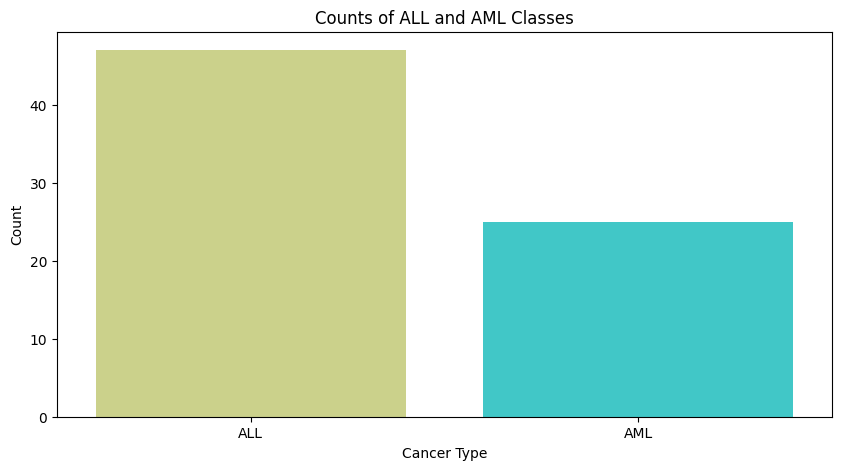

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='cancer', data=merged_data, palette="rainbow_r")
plt.title("Counts of ALL and AML Classes")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

In [31]:
# Perform one-hot encoding on the 'cancer' column
merged_data_encoded = pd.get_dummies(merged_data, columns=['cancer'], dtype=int)


In [32]:
merged_data_encoded.head(5)

,patient,0,1,2,3,4,5,6,7,8,...,7121,7122,7123,7124,7125,7126,7127,7128,cancer_ALL,cancer_AML
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,-125,389,-37,793,329,36,191,-37,1,0
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,-36,442,-17,782,295,11,76,-14,1,0
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,33,168,52,1138,777,41,228,-41,1,0
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,218,174,-110,627,170,-50,126,-91,1,0
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,57,504,-26,250,314,14,56,-25,1,0


In [33]:
# Splitting data into features (X) and target labels (y)
x = merged_data_encoded.drop(columns=['cancer_ALL', 'cancer_AML'])  # Exclude the one-hot encoded columns
y = merged_data_encoded[['cancer_ALL', 'cancer_AML']]  # Include the one-hot encoded columns in your target labels


In [34]:
x.shape

(72, 7130)

In [35]:
x.head(10)

,patient,0,1,2,3,4,5,6,7,8,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25
5,6,-138,-85,215,71,-272,-558,67,-186,87,...,115,1221,-76,172,-74,645,341,26,193,-53
6,7,-72,-144,238,55,-399,-551,131,-179,126,...,30,819,-178,151,-18,1140,482,10,369,-42
7,8,-413,-260,7,-2,-541,-790,-275,-463,70,...,289,629,-86,302,23,1799,446,59,781,20
8,9,5,-127,106,268,-210,-535,0,-174,24,...,356,980,6,177,-12,758,385,115,244,-39
9,10,-88,-105,42,219,-178,-246,328,-148,177,...,42,986,26,101,21,570,359,9,171,7


In [36]:
y.shape

(72, 2)

In [37]:
y.head(10)

,cancer_ALL,cancer_AML
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [38]:
# Split the data into training and testing sets with a test size of 0.27

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.27, random_state=42)

In [39]:
# Checking the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (52, 7130)
X_test shape: (20, 7130)
y_train shape: (52, 2)
y_test shape: (20, 2)


Standardization (Z-score scaling) 

Ploting Violin plot of X_train before scaling

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

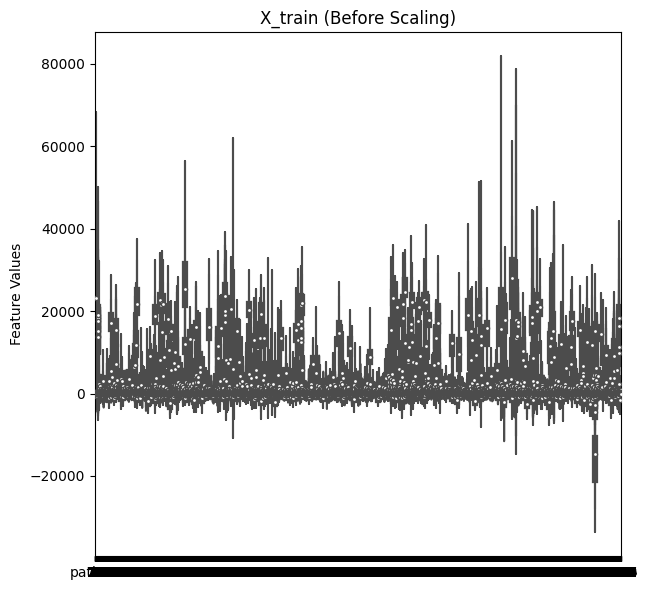

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=X_train, color='b')
plt.title('X_train (Before Scaling)')
plt.ylabel('Feature Values')
plt.tight_layout()
plt.show()

In [41]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [42]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Fiting the scaler to X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ploting Violin plot of X_train After scaling

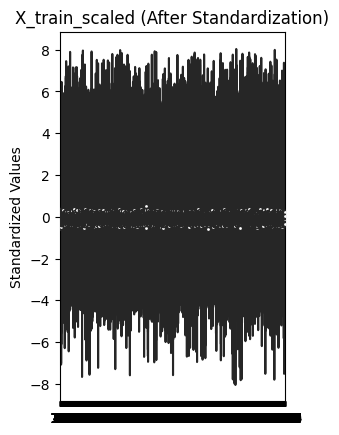

In [43]:

plt.subplot(1, 2, 2)
sns.violinplot(data=X_train_scaled, color='g')
plt.title('X_train_scaled (After Standardization)')
plt.ylabel('Standardized Values')
plt.show()

Dimensionality Reduction 

PCA(Principal Component Analysis)

In [44]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired explained variance
desired_variance = 0.95  # Set your desired explained variance

# Create PCA with n_components set to the desired explained variance
pca = PCA(n_components=desired_variance)

# Fit PCA on X_train
X_train_pca = pca.fit_transform(X_train)

# Transform X_test using the same PCA
X_test_pca = pca.transform(X_test)

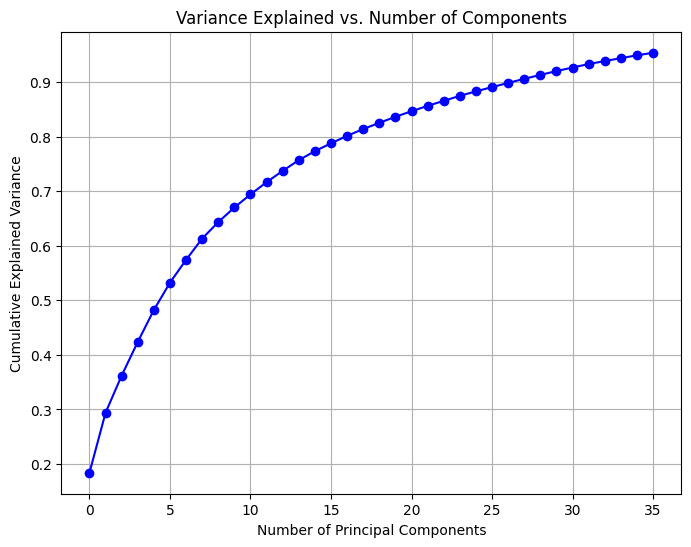

In [45]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the variance explained with respect to the number of components
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained vs. Number of Components')
plt.grid(True)
plt.show()

In [46]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # Find the index where cumulative variance >= 95%
print('%d components explain 95%% of the variation in data' % n_components_95)


36 components explain 95% of the variation in data


Initializing the four regression models

I have choosen 4 models 

1) Logistic Regression

2) Decision Tree Regression

3) Random Forest Regression

4) Support Vector Regression



I will work on 4 models and conduct model evaluation on them to see which model gives the more accuracy and conclude on that model is the optimized model that can be used for my dataset for predictive analysis.

Logistic Regression 

In [56]:
# Importing the LinearRegression model
from sklearn.linear_model import LinearRegression

In [58]:
# Creating an instance of the LinearRegression model
linear_reg = LinearRegression()

In [59]:
# Training the model on training data
linear_reg.fit(X_train_pca, y_train)

LinearRegression()

In [63]:
# Making predictions using the model on your test data
y_pred_linear = linear_reg.predict(X_test_pca)

# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, r2_score

#Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
#R-squared (R^2) Score
r2_linear = r2_score(y_test, y_pred_linear)

# Bias-Variance Trade-off
bias_linear = mse_linear
variance_linear = r2_linear

# Predictive Accuracy
accuracy_linear = 1 - mse_linear


print("Linear Regression Mean Squared Error:", mse_linear)
print("linear Regression R-squared:", r2_linear)
print("Bias-Variance Trade-off (Bias):", bias_linear)
print("Bias-Variance Trade-off (Variance):", variance_linear)
print("Predictive Accuracy:", accuracy_linear)

Linear Regression Mean Squared Error: 0.03982221815953289
linear Regression R-squared: 0.8340740910019463
Bias-Variance Trade-off (Bias): 0.03982221815953289
Bias-Variance Trade-off (Variance): 0.8340740910019463
Predictive Accuracy: 0.9601777818404671


Decision Tree Regression

In [64]:
# Importing the DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor

In [65]:
# Creating an instance of the DecisionTreeRegressor model
decision_tree_reg = DecisionTreeRegressor()

In [66]:
# Training the model on training data
decision_tree_reg.fit(X_train_pca, y_train)

DecisionTreeRegressor()

In [67]:
# Making predictions using the model on your test data
y_pred_decision_tree = decision_tree_reg.predict(X_test_pca)

# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)

# R-squared (R²) Score
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Bias-Variance Trade-off
bias_decision_tree = mse_decision_tree
variance_decision_tree = r2_decision_tree

# Predictive Accuracy
accuracy_decision_tree = 1 - mse_decision_tree

print("Decision Tree Regression Mean Squared Error:", mse_decision_tree)
print("Decision Tree Regression R-squared:", r2_decision_tree)
print("Bias-Variance Trade-off (Bias):", bias_decision_tree)
print("Bias-Variance Trade-off (Variance):", variance_decision_tree)
print("Predictive Accuracy:", accuracy_decision_tree)

Decision Tree Regression Mean Squared Error: 0.1
Decision Tree Regression R-squared: 0.5833333333333334
Bias-Variance Trade-off (Bias): 0.1
Bias-Variance Trade-off (Variance): 0.5833333333333334
Predictive Accuracy: 0.9


Random Forest Regressor

In [68]:
# Import the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor


In [69]:
# Create an instance of the RandomForestRegressor model
random_forest_reg = RandomForestRegressor()

In [70]:
# Train the model on your training data
random_forest_reg.fit(X_train_pca, y_train)

RandomForestRegressor()

In [71]:
# Make predictions using the model on your test data
y_pred_random_forest = random_forest_reg.predict(X_test_pca)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# R-squared (R²) Score
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Bias-Variance Trade-off
bias_random_forest = mse_random_forest
variance_random_forest = r2_random_forest

# Predictive Accuracy
accuracy_random_forest = 1 - mse_random_forest

print("Random Forest Regression Mean Squared Error:", mse_random_forest)
print("Random Forest Regression R-squared:", r2_random_forest)
print("Bias-Variance Trade-off (Bias):", bias_random_forest)
print("Bias-Variance Trade-off (Variance):", variance_random_forest)
print("Predictive Accuracy:", accuracy_random_forest)

Random Forest Regression Mean Squared Error: 0.08077500000000001
Random Forest Regression R-squared: 0.6634375
Bias-Variance Trade-off (Bias): 0.08077500000000001
Bias-Variance Trade-off (Variance): 0.6634375
Predictive Accuracy: 0.919225


Support Vector Regressor

In [72]:
# Import the SVR model
from sklearn.svm import SVR

In [73]:
# Create an instance of the SVR model
svr = SVR()

In [74]:
# Extract the first column of y_train as a 1D array
y_train_svr = y_train.iloc[:, 0].values

In [75]:
# Train the model on your training data
svr.fit(X_train_pca, y_train_svr)

SVR()

In [76]:
y_test_svr = y_test.iloc[:, 0]

In [77]:
# Make predictions using the model on your test data
y_pred_svr = svr.predict(X_test_pca)

# Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)

# R-squared (R²) Score
r2_svr = r2_score(y_test_svr, y_pred_svr)

# Bias-Variance Trade-off
bias_svr = mse_svr
variance_svr = r2_svr

# Predictive Accuracy
accuracy_svr = 1 - mse_svr

print("Support Vector Regression Mean Squared Error:", mse_svr)
print("Support Vector Regression R-squared:", r2_svr)
print("Bias-Variance Trade-off (Bias):", bias_svr)
print("Bias-Variance Trade-off (Variance):", variance_svr)
print("Predictive Accuracy:", accuracy_svr)

Support Vector Regression Mean Squared Error: 0.05042753808875391
Support Vector Regression R-squared: 0.7898852579635254
Bias-Variance Trade-off (Bias): 0.05042753808875391
Bias-Variance Trade-off (Variance): 0.7898852579635254
Predictive Accuracy: 0.9495724619112461


Summary table to determine which model is best suited for predictive analysis of cancer data

In [78]:
from tabulate import tabulate

# Create a list of lists to store the model metrics
model_metrics = [
    ["Linear Regression", mse_linear, r2_linear, bias_linear, variance_linear, accuracy_linear],
    ["Decision Tree Regressor", mse_decision_tree, r2_decision_tree, bias_decision_tree, variance_decision_tree, accuracy_decision_tree],
    ["Random Forest Regressor", mse_random_forest, r2_random_forest, bias_random_forest, variance_random_forest, accuracy_random_forest],
    ["Support Vector Regressor", mse_svr, r2_svr, bias_svr, variance_svr, accuracy_svr]
]

# Define column headers
headers = ["Model", "MSE", "R-squared", "Bias", "Variance", "Accuracy"]

# Use tabulate to format the table
model_selection = tabulate(model_metrics, headers, tablefmt="pretty")

# Print the nicely formatted table
print(model_selection)

+--------------------------+---------------------+--------------------+---------------------+--------------------+--------------------+
|          Model           |         MSE         |     R-squared      |        Bias         |      Variance      |      Accuracy      |
+--------------------------+---------------------+--------------------+---------------------+--------------------+--------------------+
|    Linear Regression     | 0.03982221815953289 | 0.8340740910019463 | 0.03982221815953289 | 0.8340740910019463 | 0.9601777818404671 |
| Decision Tree Regressor  |         0.1         | 0.5833333333333334 |         0.1         | 0.5833333333333334 |        0.9         |
| Random Forest Regressor  | 0.08077500000000001 |     0.6634375      | 0.08077500000000001 |     0.6634375      |      0.919225      |
| Support Vector Regressor | 0.05042753808875391 | 0.7898852579635254 | 0.05042753808875391 | 0.7898852579635254 | 0.9495724619112461 |
+--------------------------+--------------------

In [84]:
# Assuming you have already trained the models (linear_reg, decision_tree_reg, random_forest_reg, svr)

# Use the trained models to make predictions on the test data
y_pred_linear = linear_reg.predict(X_test_pca)
y_pred_decision_tree = decision_tree_reg.predict(X_test_pca)
y_pred_random_forest = random_forest_reg.predict(X_test_pca)
y_pred_svr = svr.predict(X_test_pca)

# Display a few predictions and actual values
predictions_df = pd.DataFrame({
    'Actual_ALL': y_test['cancer_ALL'].values,
    'Actual_AML': y_test['cancer_AML'].values,
    'Linear_Reg_Pred_ALL': y_pred_linear[:, 0],
    'Linear_Reg_Pred_AML': y_pred_linear[:, 1],
    'Decision_Tree_Pred_ALL': y_pred_decision_tree[:, 0],
    'Decision_Tree_Pred_AML': y_pred_decision_tree[:, 1],
    'Random_Forest_Pred_ALL': y_pred_random_forest[:, 0],
    'Random_Forest_Pred_AML': y_pred_random_forest[:, 1],
    'SVR_Pred_ALL': y_pred_svr,
})

# Display the predictions DataFrame
print(predictions_df.head())

   Actual_ALL  Actual_AML  Linear_Reg_Pred_ALL  Linear_Reg_Pred_AML  \
0           1           0             0.874984             0.125016   
1           0           1             0.047478             0.952522   
2           1           0             1.032473            -0.032473   
3           1           0             1.111469            -0.111469   
4           0           1             0.167981             0.832019   

   Decision_Tree_Pred_ALL  Decision_Tree_Pred_AML  Random_Forest_Pred_ALL  \
0                     1.0                     0.0                     1.0   
1                     0.0                     1.0                     0.0   
2                     1.0                     0.0                     1.0   
3                     1.0                     0.0                     1.0   
4                     1.0                     0.0                     0.8   

   Random_Forest_Pred_AML  SVR_Pred_ALL  
0                     0.0      0.878995  
1                     1.0 